## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import datetime
from datetime import datetime

In [2]:
df = pd.read_csv('../data/combined_crypto_USD.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,datetime,open,high,low,close,volume,symbol
0,0,0,2022-01-01 00:00:00,0.4162,0.4204,0.4166,0.4192,26337.3,POWRUSD
1,1,1,2022-01-01 01:00:00,0.4192,0.4250,0.4199,0.4211,56980.8,POWRUSD
2,2,2,2022-01-01 02:00:00,0.4186,0.4229,0.4211,0.4186,27973.3,POWRUSD
3,3,3,2022-01-01 03:00:00,0.4185,0.4204,0.4189,0.4186,26386.4,POWRUSD
4,4,4,2022-01-01 04:00:00,0.4173,0.4197,0.4194,0.4183,16900.1,POWRUSD


In [3]:
df.drop(columns=df.columns[:2], axis=1, inplace=True)
df.head()

,datetime,open,high,low,close,volume,symbol
0,2022-01-01 00:00:00,0.4162,0.4204,0.4166,0.4192,26337.3,POWRUSD
1,2022-01-01 01:00:00,0.4192,0.4250,0.4199,0.4211,56980.8,POWRUSD
2,2022-01-01 02:00:00,0.4186,0.4229,0.4211,0.4186,27973.3,POWRUSD
3,2022-01-01 03:00:00,0.4185,0.4204,0.4189,0.4186,26386.4,POWRUSD
4,2022-01-01 04:00:00,0.4173,0.4197,0.4194,0.4183,16900.1,POWRUSD


In [4]:
print(df.dtypes)

datetime     object
open        float64
high        float64
low         float64
close       float64
volume      float64
symbol       object
dtype: object


In [5]:
print(df['symbol'].value_counts()) #474 products in total

POWRUSD          3625
CVCUSD           3625
SUKUUSD          3625
AXSUSD           3625
AVAXUSDT         3625
                 ... 
BCHUPUSDT          70
BCHDOWNUSDT        70
LUNCBUSD           44
USTCBUSD           44
BTCAUCTIONUSD       2
Name: symbol, Length: 924, dtype: int64


In [29]:
cur_list = ['BTCUSD', 'DOGEUSD', 'ETHUSD', 'LTCUSD', 'BCHUSD', 'SOLUSD', 'ADAUSD']

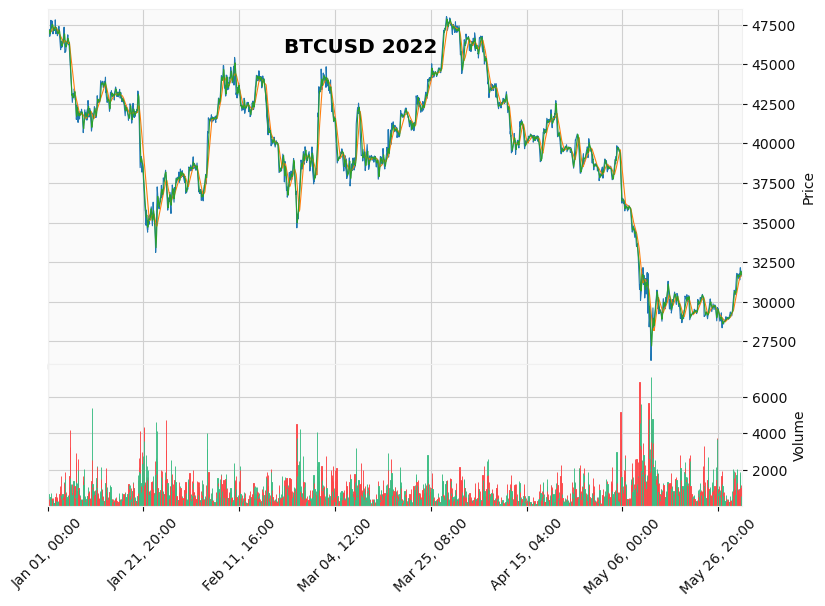

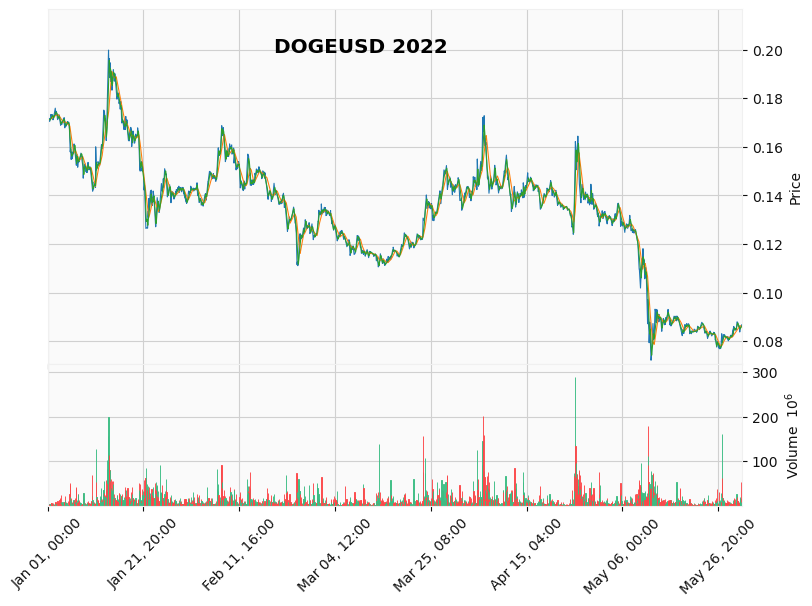

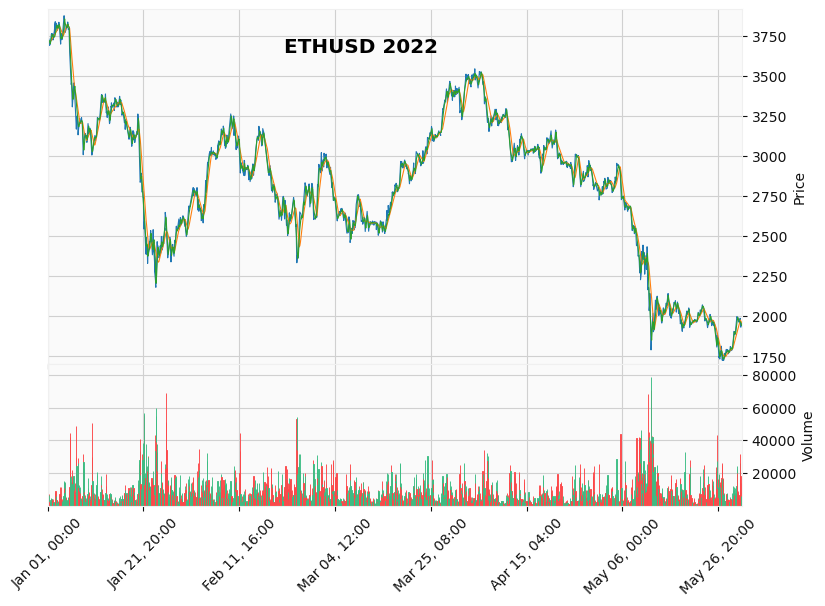

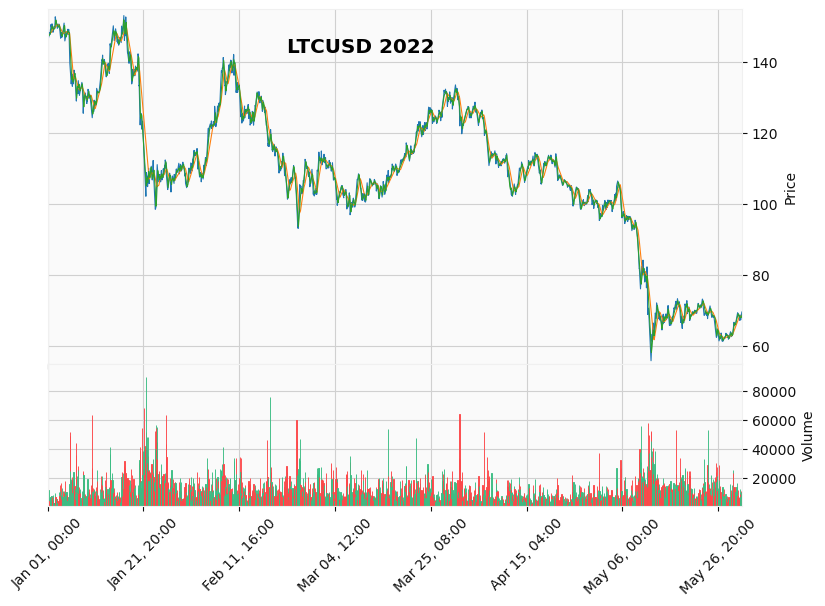

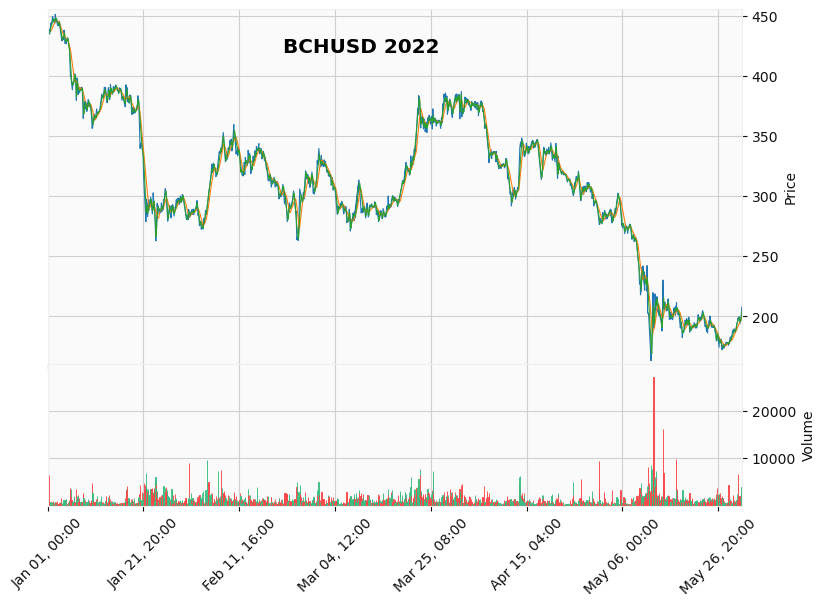

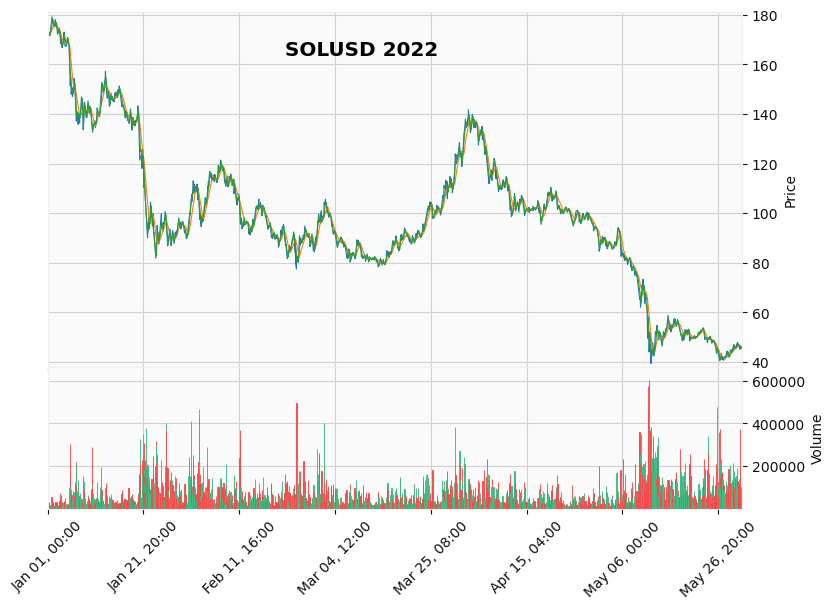

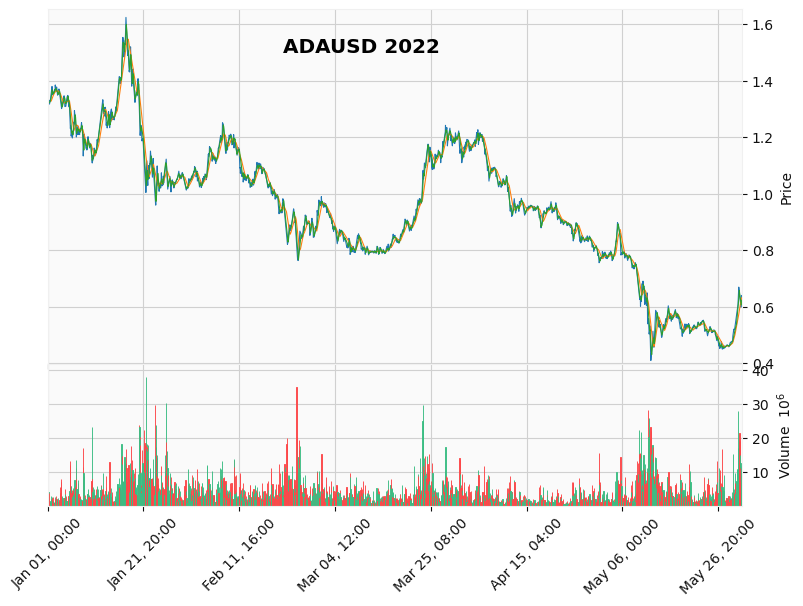

In [30]:
# choose 7 popular currencies to draw line chart in 2022

for cur in cur_list:
    df_cur = df[df['symbol'] == cur]
    df_cur = df_cur.drop(['symbol'], axis=1)
    df_cur['datetime'] = pd.to_datetime(df_cur['datetime'])
    df_cur.set_index('datetime', inplace=True)
    mpf.plot(df_cur, title=cur+' 2022', type='line', tight_layout=True, mav=(20, 5), volume=True, style = 'yahoo')
    # mpf.plot(df_cur, title=cur+' 2022', type='candle', tight_layout=True, mav=(20, 5), volume=True, style = 'yahoo')
    # mpf.plot(df_cur, title=cur+' 2022', type='candle', tight_layout=True, mav=(20, 5), volume=True, savefig='fig/'+cur+'.png', style='yahoo')

Stacked Histogram: 01/01/2022-06/01/2022, times of going up or down.

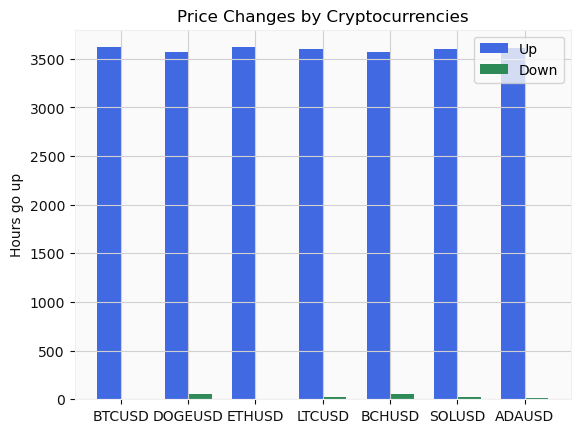

In [32]:
df_dir = []
for cur in cur_list:
    df_cur = df[df['symbol'] == cur]
    df_dir.append([np.sum(df_cur.close > df_cur.open), np.sum(df_cur.close <= df_cur.open)])

N = 7
up = [x[0] for x in df_dir]
down = [x[1] for x in df_dir]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot()
rects1 = ax.bar(ind, up, width, color='royalblue')
rects2 = ax.bar(ind+width, down, width, color='seagreen')

# add some
ax.set_ylabel('Hours go up')
ax.set_title('Price Changes by Cryptocurrencies')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('BTCUSD', 'DOGEUSD', 'ETHUSD', 'LTCUSD', 'BCHUSD', 'SOLUSD', 'ADAUSD') )

ax.legend( (rects1[0], rects2[0]), ('Up', 'Down') )

plt.show()
plt.close()

### Plots of the hourly percent change (close to open percent), high - low ratio

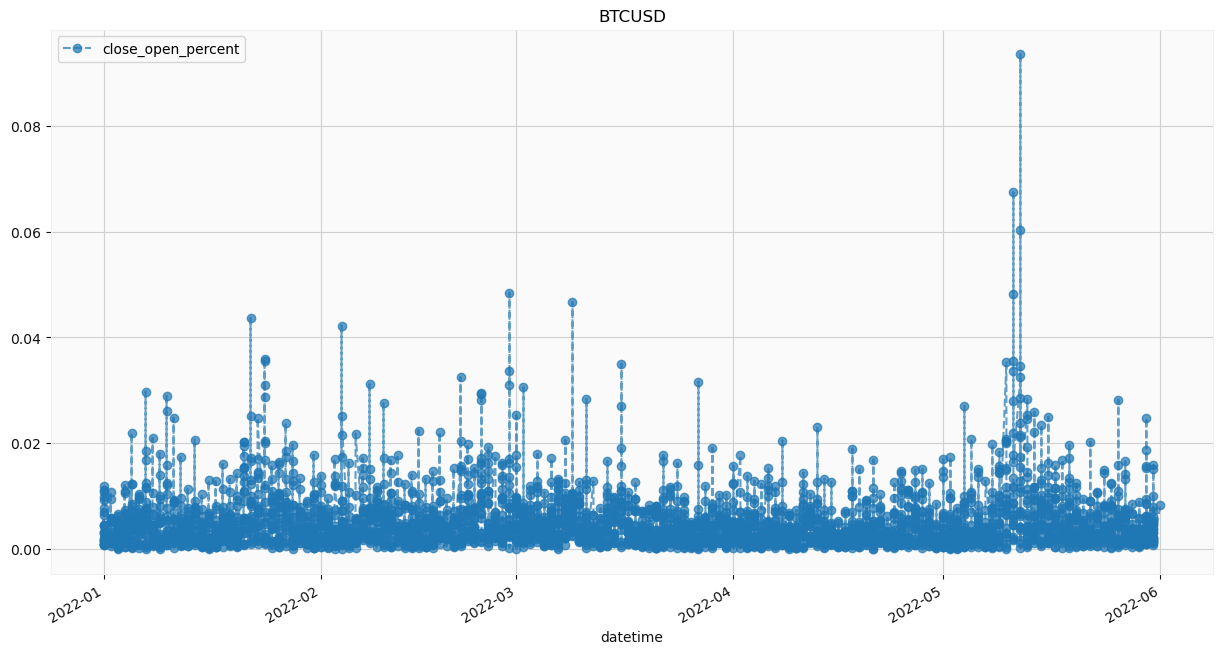

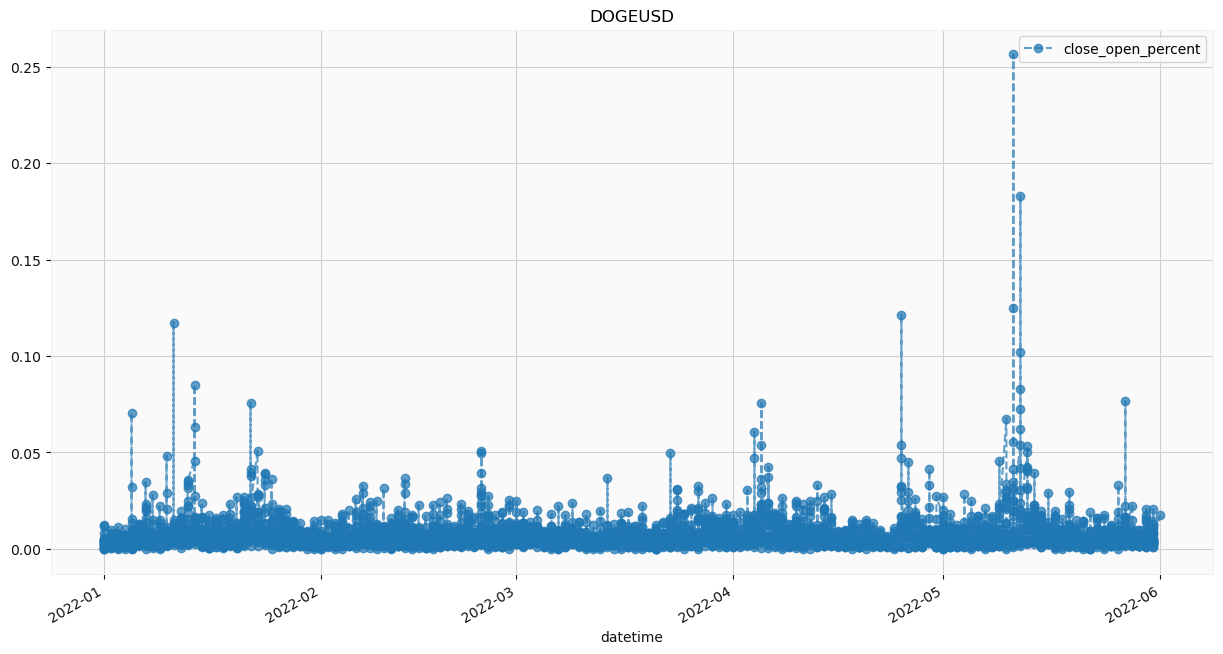

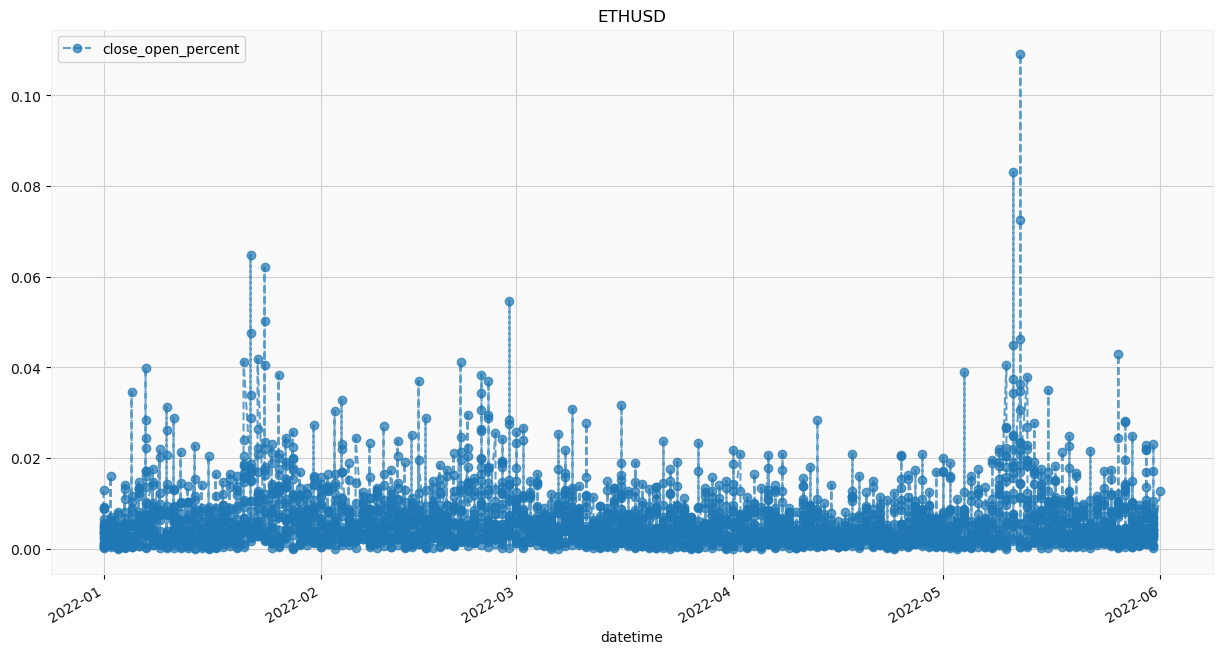

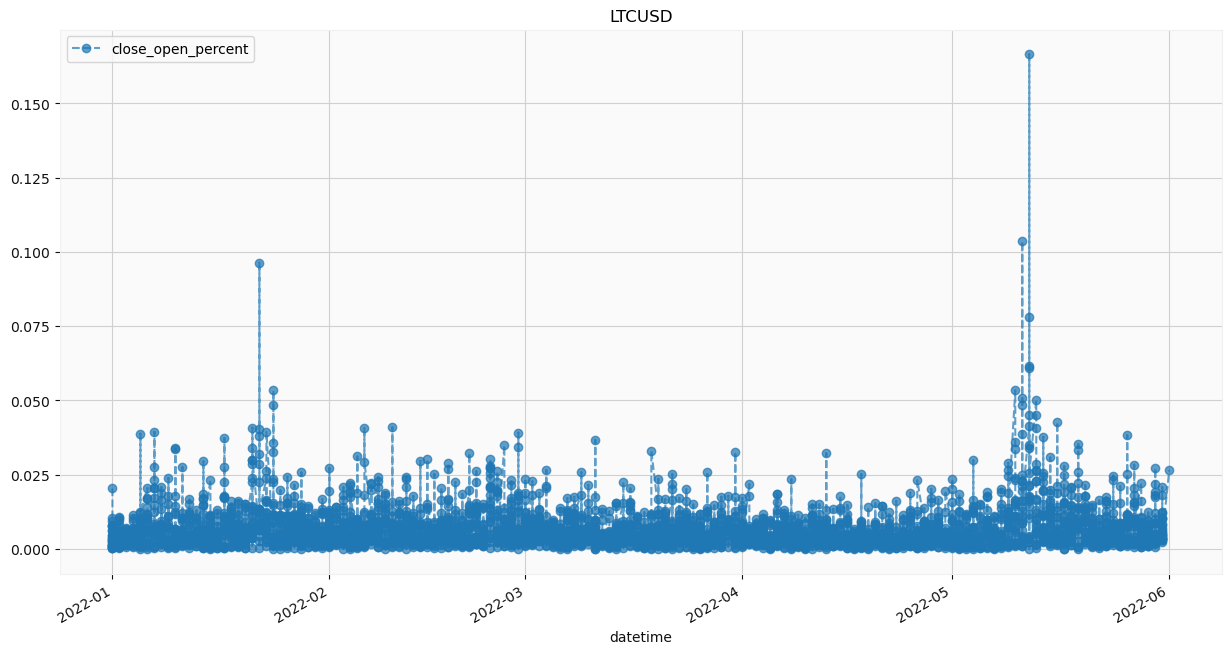

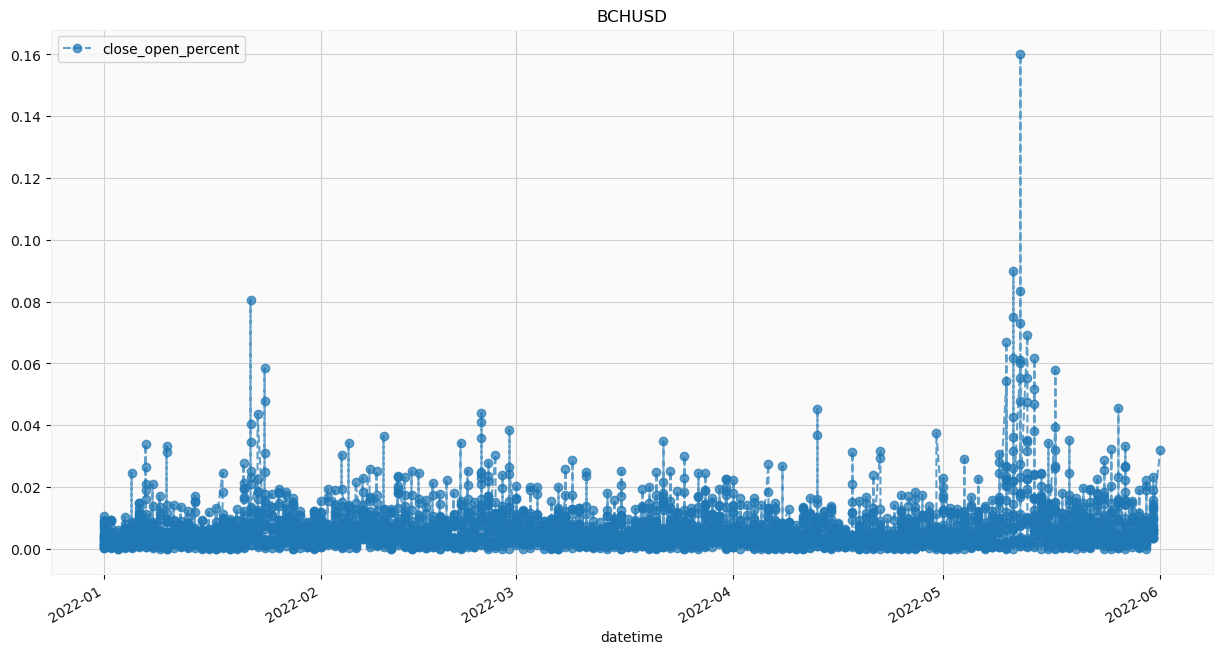

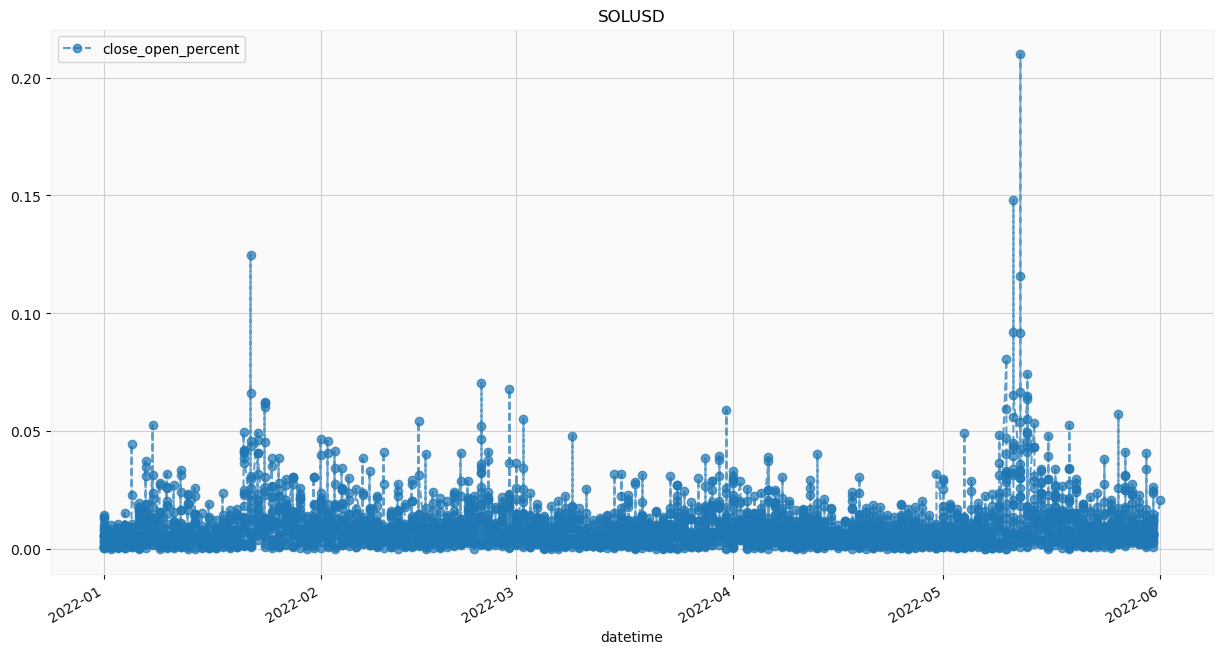

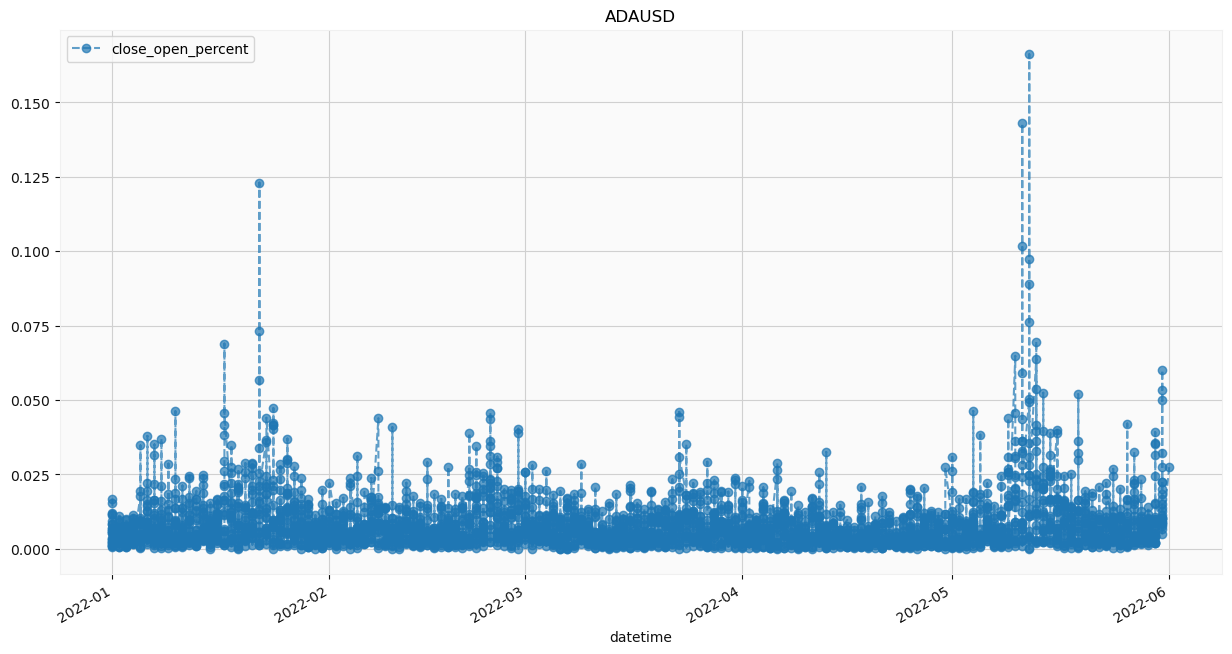

In [34]:
# Hourly percent changes
for cur in cur_list:
    df_cur = df[df['symbol'] == cur].copy()
    df_cur['close_open_percent'] = (df_cur.close - df_cur.open)/df_cur.open
    df_cur.loc[:, ('datetime')] = pd.to_datetime(list(df_cur['datetime'])).strftime('%Y-%m-%d')
    df_cur.index = pd.DatetimeIndex(df_cur['datetime'])
    plt.figure(figsize=(15, 8))
    plt.grid()
    df_cur['close_open_percent'].plot(legend=True,linestyle='--',marker='o',ms=6, alpha=0.7)
    plt.title(cur)
    plt.show()
    plt.close() 

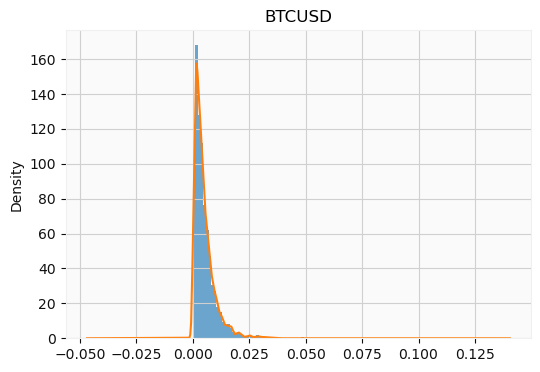

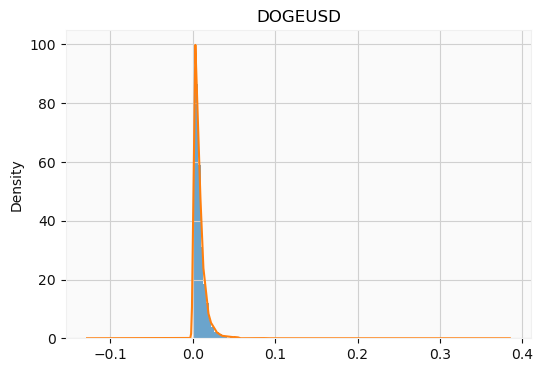

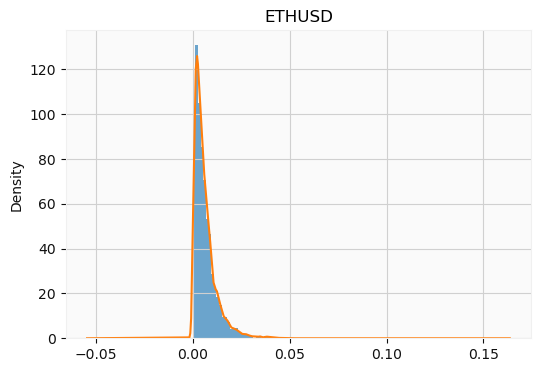

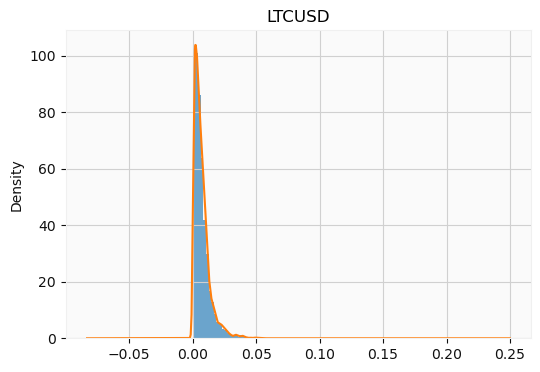

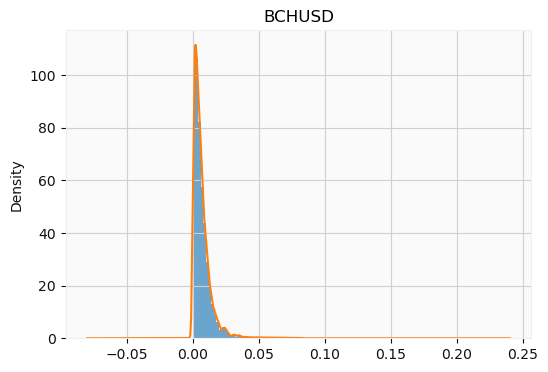

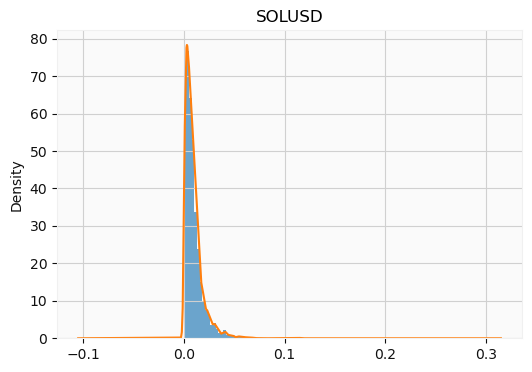

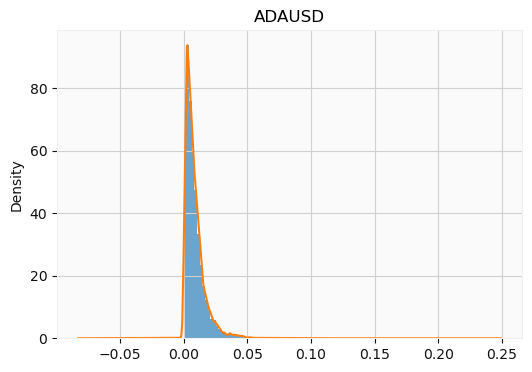

In [35]:
# Hourly percent changes: distribution
for cur in cur_list:
    df_cur = df[df['symbol'] == cur].copy()
    df_cur['close_open_percent'] = (df_cur.close - df_cur.open)/df_cur.open
    plt.figure(figsize=(6, 4))
    df_cur['close_open_percent'].plot(kind="hist",density=True,alpha=0.65, bins = 80)
    df_cur['close_open_percent'].plot(kind="kde", bw_method=0.1)
    plt.title(cur)
    plt.show()
    plt.close()

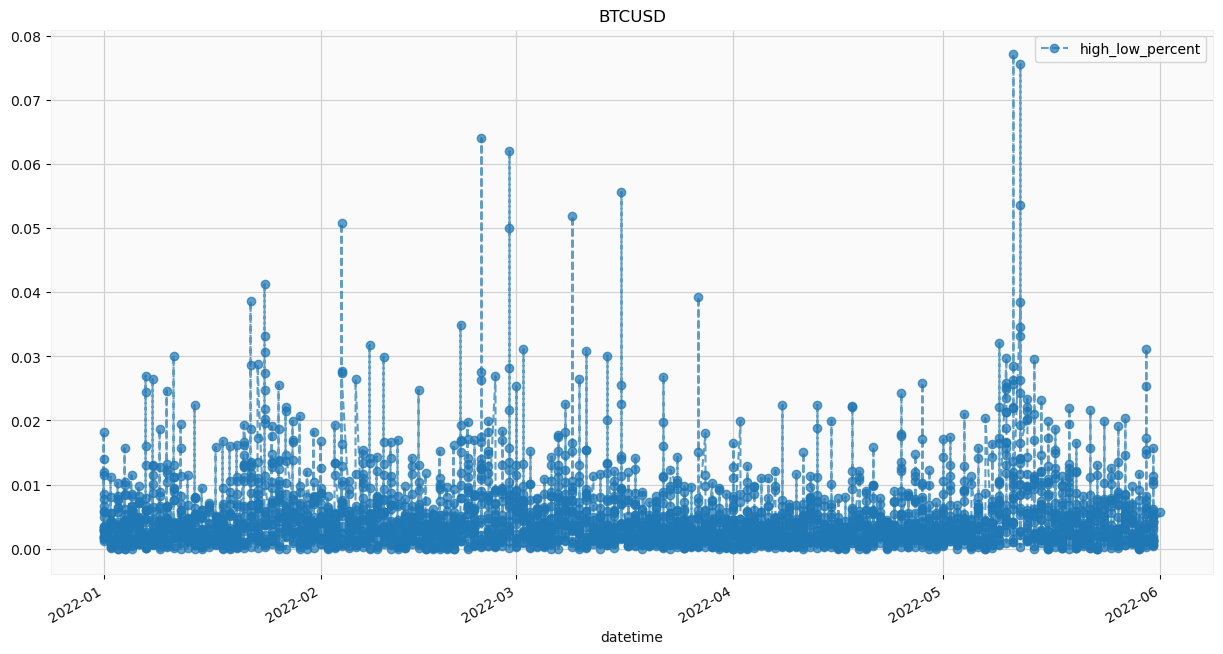

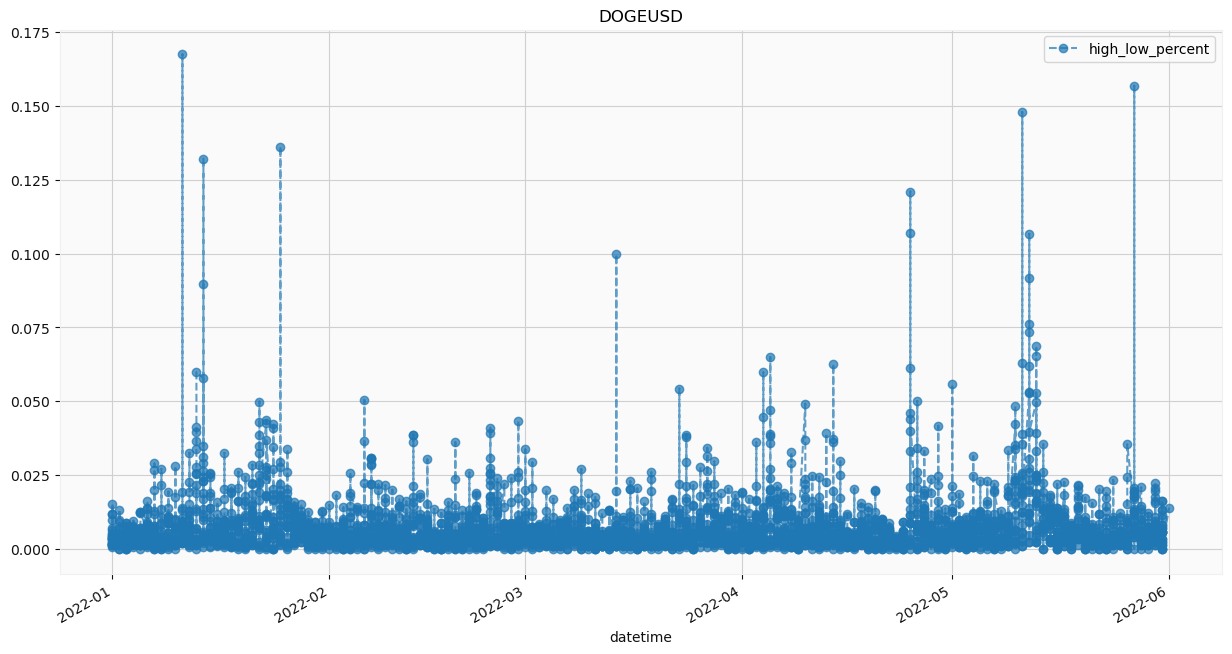

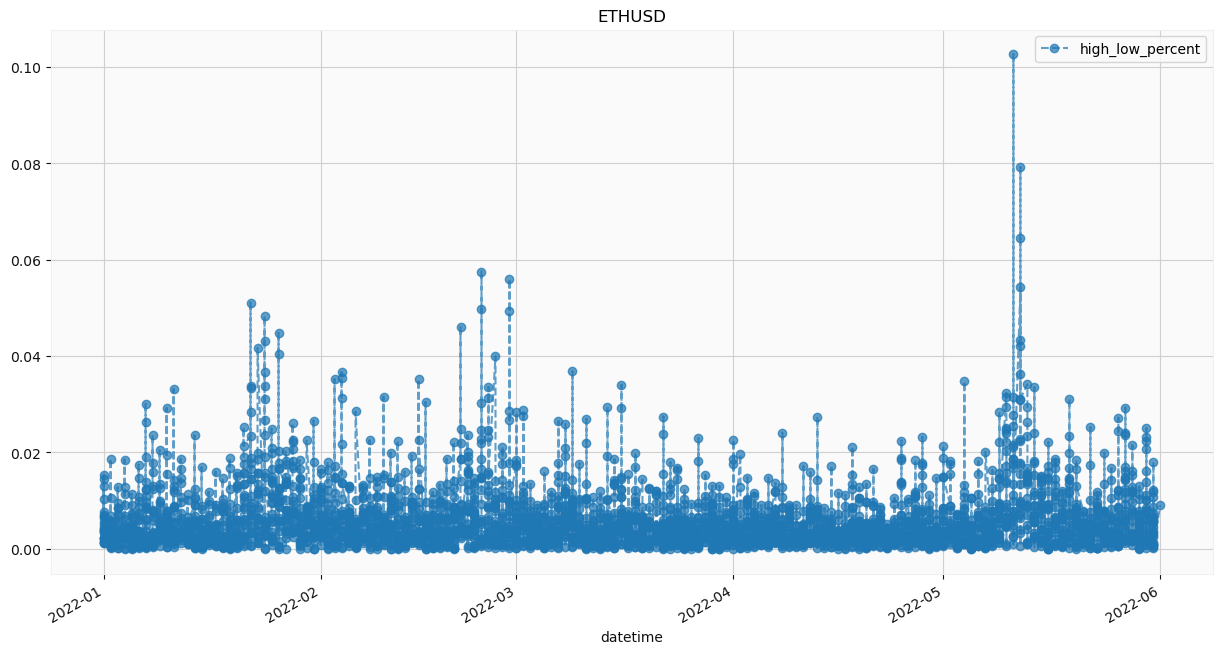

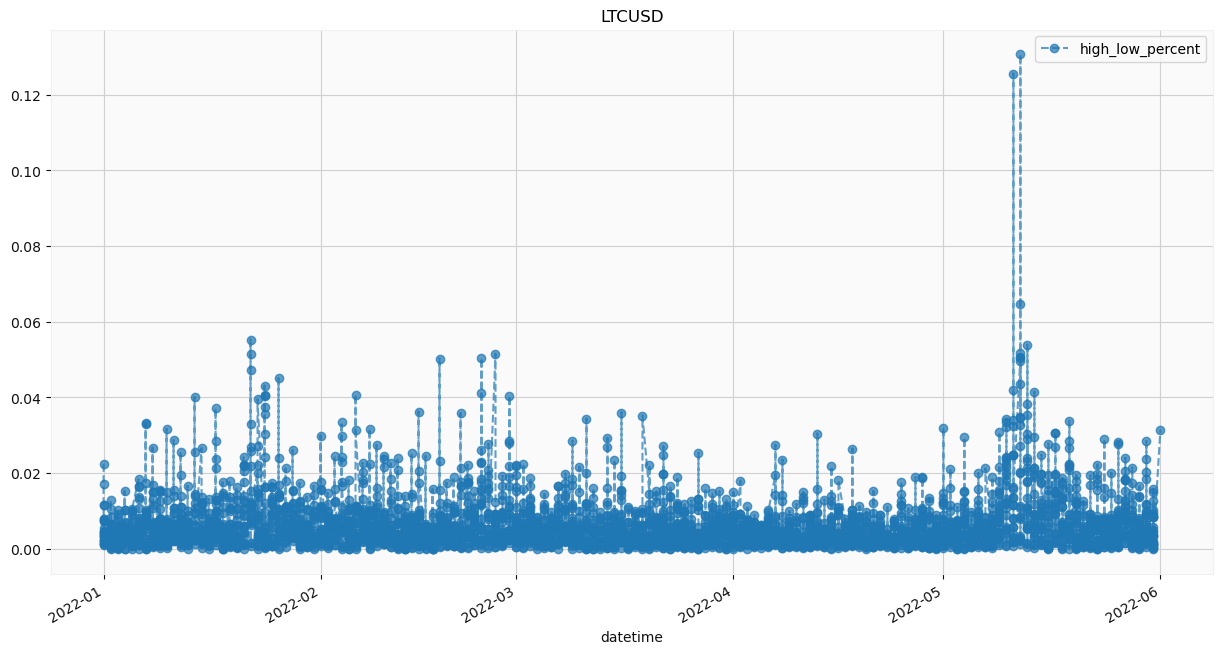

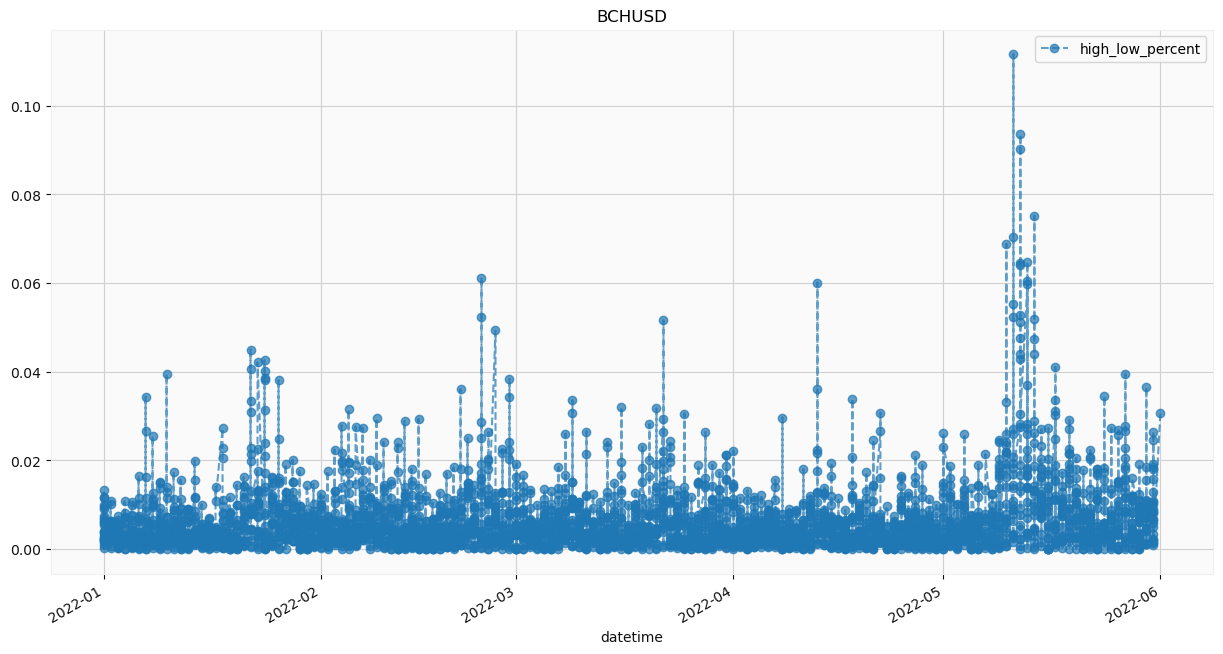

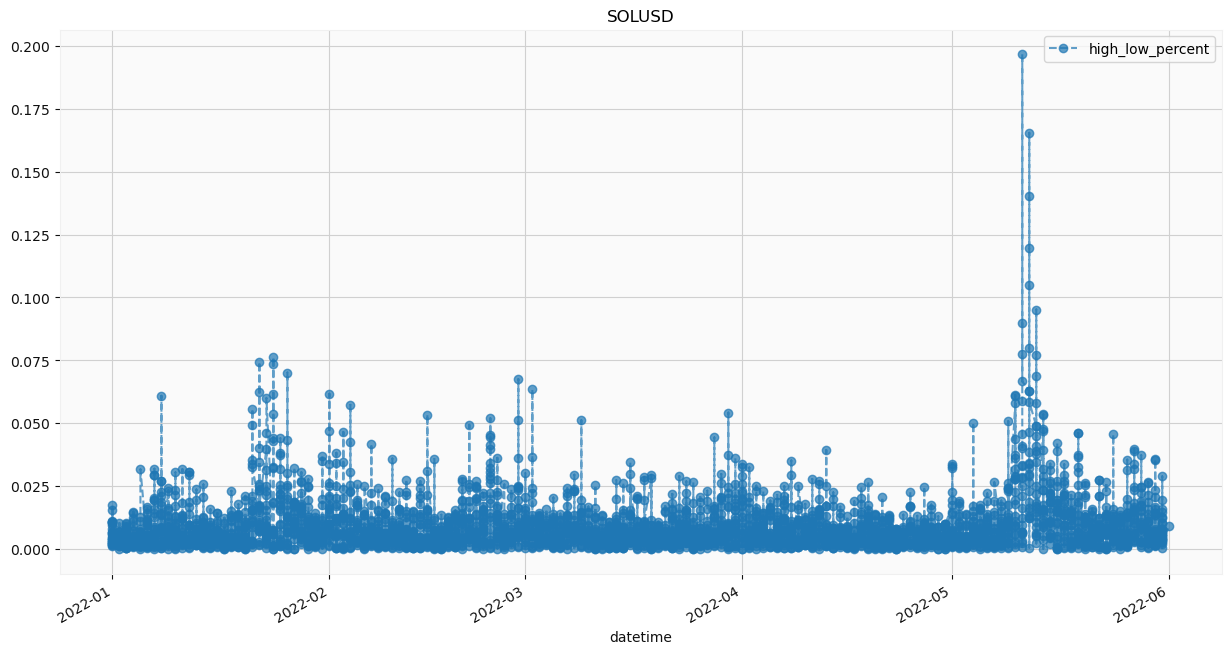

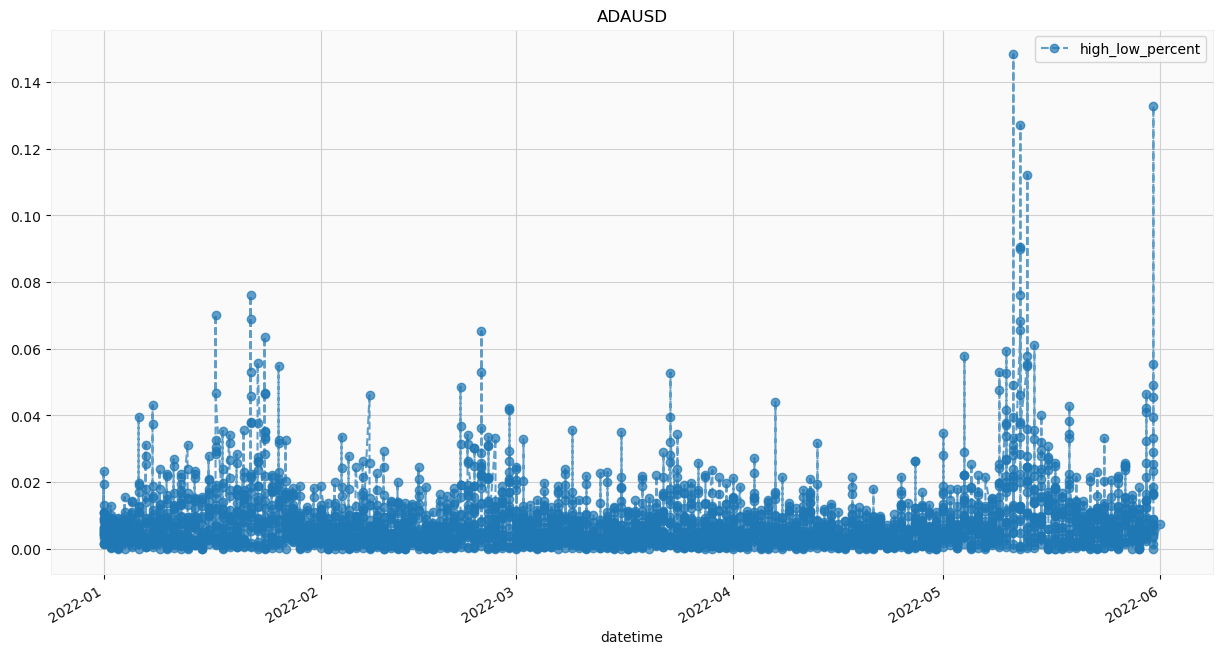

In [36]:
for cur in cur_list:
    df_cur = df[df['symbol'] == cur].copy()
    df_cur['high_low_percent'] = (df_cur.high - df_cur.low)/df_cur.low
    df_cur.loc[:, ('datetime')] = pd.to_datetime(list(df_cur['datetime'])).strftime('%Y-%m-%d')
    df_cur.index = pd.DatetimeIndex(df_cur['datetime'])
    plt.figure(figsize=(15, 8))
    plt.grid(True)
    df_cur['high_low_percent'].plot(legend=True,linestyle='--',marker='o',ms=6, alpha=0.7)
    plt.title(cur)
    plt.show()
    plt.close()

### Correlation Plots

In [37]:
d = {cur: df.loc[df['symbol']==cur, ('close')].values for cur in cur_list}
df_close = pd.DataFrame(data=d)
df_close['datetime'] = df.datetime.copy()
df_close['datetime'] = pd.to_datetime(df_close['datetime'])
df_close.set_index('datetime', inplace=True)
df_close.head()

,BTCUSD,DOGEUSD,ETHUSD,LTCUSD,BCHUSD,SOLUSD,ADAUSD
datetime,,,,,,,
2022-01-01 00:00:00,46656.85,0.1719,3722.78,149.09,434.84,172.40,1.3301
2022-01-01 01:00:00,46780.85,0.1720,3724.22,148.24,434.95,172.72,1.3278
2022-01-01 02:00:00,46808.55,0.1717,3727.94,148.02,434.76,172.70,1.3255
2022-01-01 03:00:00,46804.01,0.1713,3722.96,147.69,434.95,172.89,1.3246
2022-01-01 04:00:00,46701.29,0.1701,3706.87,146.75,432.71,171.35,1.3078


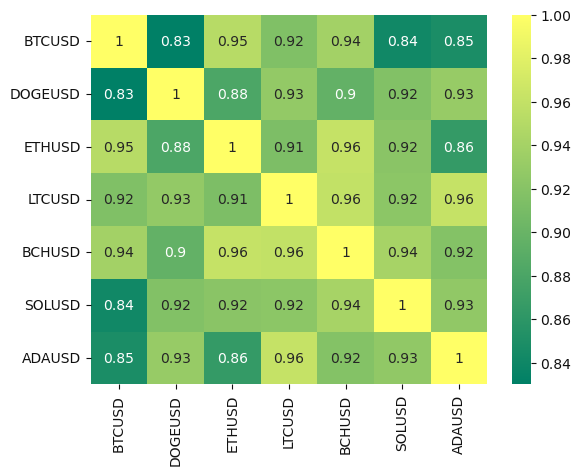

In [38]:
import seaborn as sns
sns.heatmap(df_close.corr(), annot=True, cmap='summer')
plt.savefig('fig/corr.png')

In [42]:
# get the number of products ending with "USD" or "USDT"
cur_usd = [cur for cur in np.unique(df.symbol) if (cur.endswith("USD") or cur.endswith("USDT")) and df[df.symbol == cur].shape[0]==3625]
print(cur_usd)
print("the number of products ending with \"USD\" or \"USDT\":", len(cur_usd))

['1INCHUSD', 'AAVEUSD', 'ACHUSD', 'ADAUSD', 'AGLDUSD', 'ALCXUSD', 'ALGOUSD', 'AMPUSD', 'ANKRUSD', 'API3USD', 'ARPAUSD', 'ASMUSD', 'ATOMUSD', 'AUCTIONUSD', 'AVAXUSD', 'AVAXUSDT', 'AXSUSD', 'BADGERUSD', 'BALUSD', 'BANDUSD', 'BATUSD', 'BCHUSD', 'BICOUSD', 'BLZUSD', 'BONDUSD', 'BTCUSD', 'BTCUSDT', 'CGLDUSD', 'CHZUSD', 'CLVUSD', 'COMPUSD', 'COTIUSD', 'COVALUSD', 'CROUSD', 'CRVUSD', 'CTSIUSD', 'CVCUSD', 'DASHUSD', 'DESOUSD', 'DOGEUSD', 'DOTUSD', 'DOTUSDT', 'ENJUSD', 'ENSUSD', 'EOSUSD', 'ETCUSD', 'ETHUSD', 'ETHUSDT', 'FARMUSD', 'FETUSD', 'FILUSD', 'FORTHUSD', 'FOXUSD', 'FXUSD', 'GALAUSD', 'GALAUSDT', 'GODSUSD', 'GRTUSD', 'GTCUSD', 'GYENUSD', 'ICPUSD', 'ICPUSDT', 'IDEXUSD', 'IMXUSD', 'IOTXUSD', 'JASMYUSD', 'KEEPUSD', 'KNCUSD', 'KRLUSD', 'LCXUSD', 'LINKUSD', 'LPTUSD', 'LRCUSD', 'LTCUSD', 'MANAUSD', 'MASKUSD', 'MATICUSD', 'MDTUSD', 'MIRUSD', 'MKRUSD', 'MLNUSD', 'NKNUSD', 'NMRUSD', 'NUUSD', 'OGNUSD', 'OMGUSD', 'ORNUSD', 'OXTUSD', 'PERPUSD', 'PLAUSD', 'POLYUSD', 'POWRUSD', 'QNTUSD', 'QUICKUSD', 'R

In [91]:
# d = {cur: list(df[df['symbol']==cur].low[:3623]/df[df['symbol']==cur].high[2:]) for cur in cur_usd}
d = {}
for cur in cur_usd:
    df_temp = df[df['symbol']==cur]
    low = np.array(df_temp['low'][:3623])
    high = np.array(df_temp['high'][2:])
    d[cur] = low / high

df_usd = pd.DataFrame(data=d)
df_usd['datetime'] = df.datetime.copy()[:3623]
df_usd['datetime'] = pd.to_datetime(df_usd['datetime'])
df_usd.set_index('datetime', inplace=True)
df_usd.head()

,1INCHUSD,AAVEUSD,ACHUSD,ADAUSD,AGLDUSD,ALCXUSD,ALGOUSD,AMPUSD,ANKRUSD,API3USD,...,UNIUSD,USDTUSD,VGXUSD,WBTCUSD,XLMUSD,XTZUSD,XYOUSD,YFIUSD,ZECUSD,ZRXUSD
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.975510,0.970011,1.011291,0.980660,0.976048,0.973293,0.980616,0.986313,0.968131,0.967963,...,0.978711,1.0002,0.983389,0.985758,0.983953,0.925214,0.995738,0.979089,0.987595,0.954045
2022-01-01 01:00:00,0.987755,0.995594,1.017377,0.999774,0.994012,0.999893,1.000177,0.997543,0.999707,0.993007,...,0.995947,0.9999,1.010067,0.994229,0.993781,0.928421,0.999177,0.991381,0.999056,0.987378
2022-01-01 02:00:00,1.000000,0.991914,0.998073,1.001131,1.000000,1.002450,0.996681,1.009085,1.011241,1.018692,...,0.999421,0.9999,1.006711,0.998816,0.996743,0.963441,0.987730,0.992995,0.999054,0.991425
2022-01-01 03:00:00,0.987805,0.979925,0.993569,0.990809,0.970588,1.000436,0.996509,1.001642,0.989376,0.995360,...,0.981777,0.9999,0.983498,0.985001,0.988467,1.002146,0.994276,0.982177,0.995155,0.983761
2022-01-01 04:00:00,0.987755,0.995995,0.979922,0.996689,0.982143,1.007477,1.000416,0.994657,0.994351,0.990719,...,0.989619,1.0000,0.970588,0.990980,0.992264,1.006508,0.989374,0.990428,0.998853,0.983393


In [92]:
df_usd_t = np.transpose(df_usd)

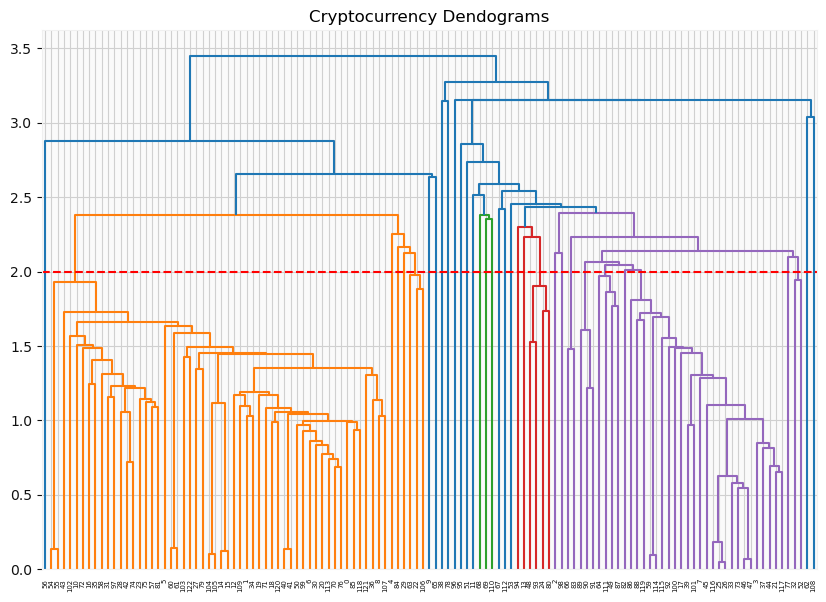

In [94]:
# hierarchy clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Cryptocurrency Dendograms")
dend = shc.dendrogram(shc.linkage(df_usd_t, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')
plt.savefig('fig/clusters.jpg')
plt.show()

In [95]:
z = shc.linkage(df_usd_t, method='ward')
print(z.shape)

(122, 4)


In [120]:
# by changing the t value, we can get different number of clusters at different thresholds
x = shc.fcluster(z, t=2, criterion='distance')
np.unique(x)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
      dtype=int32)

In [121]:
cluster_1 = [cur_usd[i] for i in range(len(x)) if x[i] == 1]
cluster_2 = [cur_usd[i] for i in range(len(x)) if x[i] == 2]
cluster_3 = [cur_usd[i] for i in range(len(x)) if x[i] == 25]
cluster_4 = [cur_usd[i] for i in range(len(x)) if x[i] == 30]

In [122]:
print(cluster_1)

['1INCHUSD', 'AAVEUSD', 'ALCXUSD', 'ALGOUSD', 'ANKRUSD', 'ARPAUSD', 'ATOMUSD', 'AVAXUSD', 'AVAXUSDT', 'AXSUSD', 'BALUSD', 'BANDUSD', 'BATUSD', 'BLZUSD', 'CGLDUSD', 'CHZUSD', 'COMPUSD', 'COTIUSD', 'CRVUSD', 'CTSIUSD', 'CVCUSD', 'DOTUSD', 'DOTUSDT', 'ENJUSD', 'ENSUSD', 'FILUSD', 'GALAUSD', 'GALAUSDT', 'GRTUSD', 'GTCUSD', 'ICPUSD', 'ICPUSDT', 'LINKUSD', 'LPTUSD', 'LRCUSD', 'MANAUSD', 'MASKUSD', 'MATICUSD', 'MKRUSD', 'NKNUSD', 'OMGUSD', 'RENUSD', 'RLCUSD', 'SKLUSD', 'SNXUSD', 'SOLUSD', 'SOLUSDT', 'STORJUSD', 'SUSHIUSD', 'UNIUSD', 'XTZUSD', 'YFIUSD', 'ZECUSD', 'ZRXUSD']


In [123]:
print(cluster_2)

['BICOUSD', 'IMXUSD', 'SPELLUSD']


In [124]:
print(cluster_3)

['ADAUSD', 'AMPUSD', 'BADGERUSD', 'BCHUSD', 'BTCUSD', 'BTCUSDT', 'CROUSD', 'DASHUSD', 'DOGEUSD', 'EOSUSD', 'ETCUSD', 'ETHUSD', 'ETHUSDT', 'GYENUSD', 'LTCUSD', 'ORNUSD', 'PERPUSD', 'QNTUSD', 'RLYUSD', 'SHIBUSD', 'USDTUSD', 'VGXUSD', 'WBTCUSD', 'XLMUSD', 'XYOUSD']


In [125]:
print(cluster_4)

['FORTHUSD']
